In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.dates as mdates
import datetime
from os import listdir, walk
from os.path import isfile, join
import xlsxwriter

In [8]:
# enter file path for longtem site here
raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-D_Longterm_L1/'

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-B_Longterm_L3/'

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-C_Longterm_L2/'

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-C_Longterm_L4/'

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-D_Longterm_L5/'

# raw_data_path = '//DLA-04/Shared/KAILUA PROJECTS/2022/22-058 P-209 EIS Noise Measurements/Noise Survey/Raw Data/SLM-B_Longterm_L6/'

#enter dates to pull for individual date plotting for the specific datafile submitted

daystopull = ['2023-02-22','2023-02-23'] ## L1, 2, 3 days
# daystopull = ['2023-02-28','2023-03-01'] ## L4, 5, 6 days


path_datafiles = [f for f in listdir(raw_data_path) if isfile(join(raw_data_path,f))]
#only read excel files, filter for .xlsx
path_datafiles = [k for k in path_datafiles if '.xlsx' in k]
print(path_datafiles)

['831_0003784-20230221 144702-23022101.LD0.xlsx', '831_0003784-20230222 000000-23022200.LD0.xlsx', '831_0003784-20230223 000000-23022300.LD0.xlsx', '831_0003784-20230224 000000-23022400.LD0.xlsx']


In [4]:
# # excel file read in tester
# working_file = path_datafiles[2]
# datasheet = 'Measurement History'
# Longterm_data = pd.read_excel(raw_data_path+working_file,datasheet)


In [10]:
# read all xcel files into single dataframe
longterm = pd.DataFrame()
for i in range(len(path_datafiles)):
    curr_longterm = pd.read_excel(raw_data_path+path_datafiles[i],datasheet)
    longterm = pd.concat([longterm, curr_longterm])
#remove periods from columns 
longterm.columns = longterm.columns.str.replace(".","")
longterm.columns = longterm.columns.str.replace("#","")

longterm = longterm.set_index('Date')

C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_9660\1077868215.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  longterm.columns = longterm.columns.str.replace(".","")


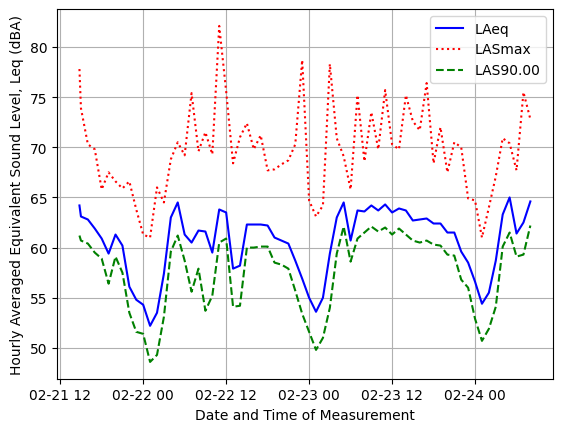

In [11]:
#plotting the entire span of data: 

plot.plot(longterm.index,longterm.LAeq, color = 'blue', linestyle = '-', label = 'LAeq')
plot.plot(longterm.index,longterm.LASmax, color = 'red', linestyle = ':', label = 'LASmax')
plot.plot(longterm.index,longterm.LAS9000,color = 'green', linestyle = '--', label = 'LAS90.00')
plot.ylabel("Hourly Averaged Equivalent Sound Level, Leq (dBA)")
plot.xlabel("Date and Time of Measurement")
plot.grid(True)
plot.legend()

#color the night time grey
# need to figure out how to programmaticlly datermine the dates here
# plot.axvspan()
# plot.axvspan('2023-02-28 07:00:00.000','2023-02-28 22:00:00.000',
#                  color = 'grey', alpha = 0.5)
# plot.axvspan(longterm.index, ,
#                  color = 'grey', alpha = 0.5)

In [138]:
# firstnight = night.index[0]
# lastnight = night.index[len(night)-1]
# print(firstnight)
# print(lastnight)
#need to filter for full days - only Date that has 24 records

# longterm['Date'] = pd.to_datetime(longterm['Date'], format='%H:%M:%S')

night = longterm.between_time('22:00:00.000', '07:00:00.000')

2023-02-27 22:00:00
2023-03-02 07:00:00


Day:  2023-02-22
LAeq min:  52.2
LAeq max:  64.5
Daytime LAeq:  61.193333333333335
Nighttime LAeq:  57.977777777777774
Ldn:  65.01970830853851
-=-=-=-=-=-=-=-=-
Day:  2023-02-23
LAeq min:  53.6
LAeq max:  64.5
Daytime LAeq:  63.12
Nighttime LAeq:  58.8111111111111
Ldn:  66.16363061549853
-=-=-=-=-=-=-=-=-


C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_9660\975915769.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dayone = longterm.get(days)
C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_9660\975915769.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dayone = longterm.get(days)


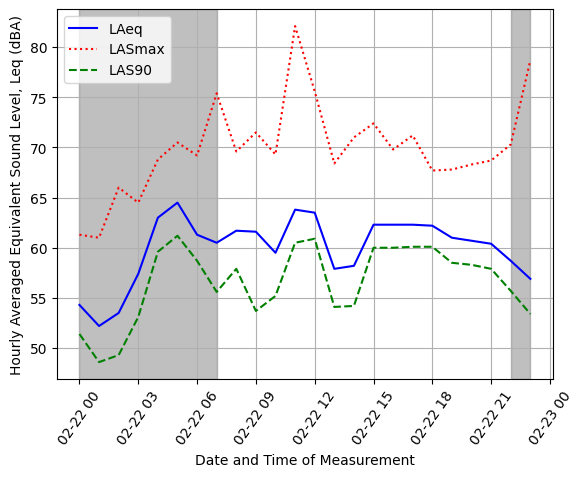

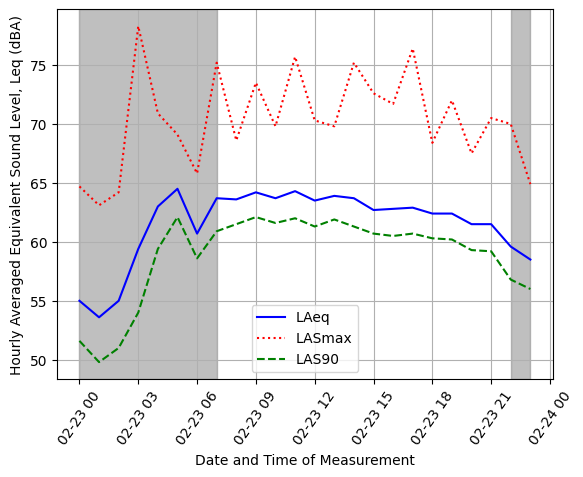

In [12]:

#plotting and statistics: 
for days in daystopull:
    dayone = longterm.get(days)
    dayone.columns = dayone.columns.str.replace(" #","")
    plot.figure(days)
    plot.plot(dayone.Time,dayone.LAeq, color = 'blue', linestyle = '-', label = 'LAeq')
    plot.plot(dayone.Time,dayone.LASmax, color = 'red', linestyle = ':', label = 'LASmax')
    plot.plot(dayone.Time,dayone.LAS9000,color = 'green', linestyle = '--', label = 'LAS90')
    plot.ylabel("Hourly Averaged Equivalent Sound Level, Leq (dBA)")
    plot.xlabel("Date and Time of Measurement")
    plot.grid(True)
    plot.legend()
    plot.axvspan(days+' 00:00:00.000',days+' 07:00:00.000',
                 color = 'grey', alpha = 0.5)
    plot.axvspan(days+' 22:00:00.000',days+' 23:00:00.000',
                 color = 'grey', alpha = 0.5)
    plot.tick_params(axis='x', rotation = 55)
    # stats for day
    print('Day: ', days)
    print('LAeq min: ',min(dayone.LAeq))
    print('LAeq max: ',max(dayone.LAeq))
    daytime = dayone.between_time('07:00:00.000','21:00:00.000')
    nighttime = pd.concat([dayone.between_time('00:00:00.000','06:00:00.000'),dayone.between_time('22:00:00.000','23:00:00.000')])
    print('Daytime LAeq: ',np.mean(daytime.LAeq))
    daytime_mean = np.mean(daytime.LAeq)
    print('Nighttime LAeq: ',np.mean(nighttime.LAeq))
    night_mean = np.mean(nighttime.LAeq)
    Level_dn = 10*(np.log10((15*(10**(daytime_mean/10))+9*(10**((night_mean+10)/10)))/24))
    print('Ldn: ',Level_dn)
    print('-=-=-=-=-=-=-=-=-')



In [63]:
# save concat data to excel if needed 


53.5